# Introduction

This guide will show you how to:

* Install ```neptune-client```,
* Connect Neptune to your Colab notebook and create the first run,
* Log simple metrics to Neptune and explore them in the UI.

# Step 0: Before you start

Make sure that you have an account with both [Google](https://support.google.com/accounts/answer/27441?hl=en) and [Neptune](https://neptune.ai/register) (optional if you just want to try out the application as an anonymous user).

# Step 1: Install ```neptune-client``` and import `neptune`

In [ ]:
! pip install --upgrade --quiet neptune-client

In [ ]:
import neptune.new as neptune

# Step 2: Initialize Neptune

Connect your script to Neptune and create a new run.

Basically, you tell Neptune: 

* **who you are**: your Neptune `api_token` 
* **where you want to send your data**: your Neptune `project`.

At this point, you will have a new run in Neptune. From now on you will use `run` to log metadata to it.

## Option 1: Initialize a public project

Neptune gives you the option of logging data under a public project as an anonymous user. This is great when you are just trying out the application and don't have a Neptune account yet.

In [ ]:
run = neptune.init(project='common/neptune-and-google-colab', api_token='ANONYMOUS')

Click on the link above to open this run in Neptune. For now it is empty but keep the tab with the run open to see what happens next. 

## Option 2: Initialize a private project

Instead of logging data to the public project `'common/neptune-and-google-colab'` as an anonymous user `'neptuner'`, you can log it to your own project.

### Get your personal ```api_token``` to initialize Neptune

Get your [Neptune API token](https://docs.neptune.ai/getting-started/installation#authentication) and pass it to Neptune:
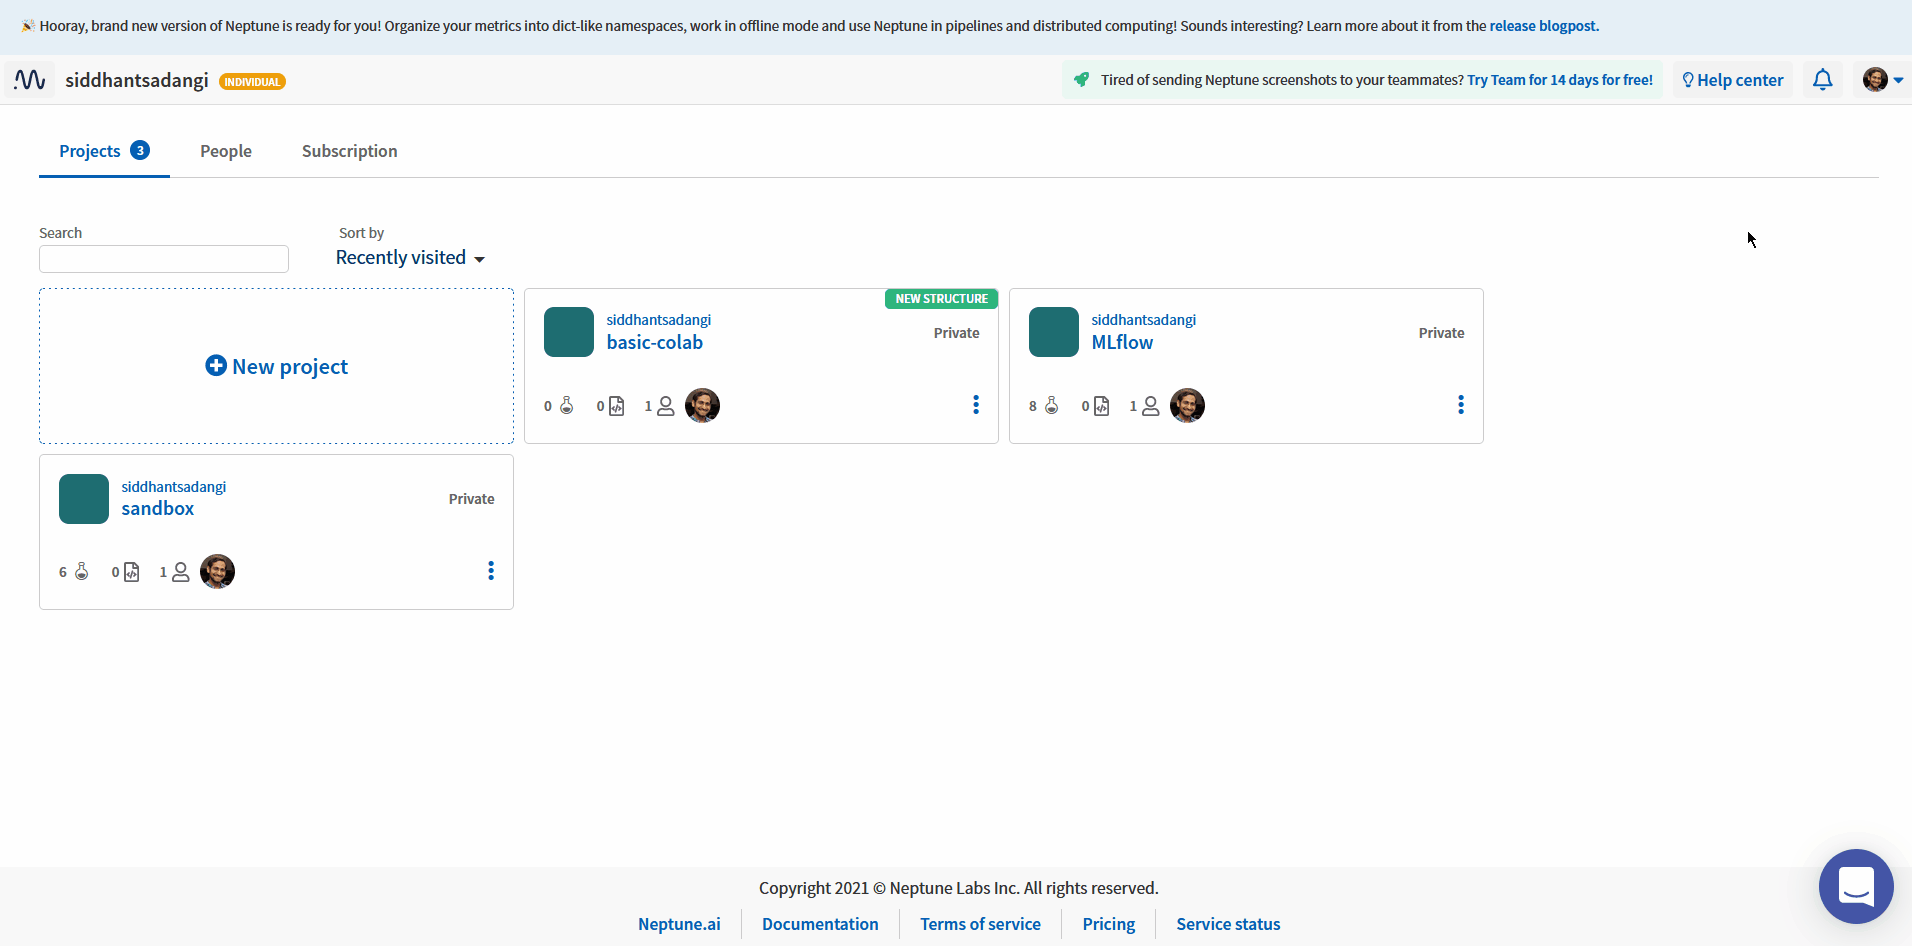

The preferred way of doing this is by using the ```getpass()``` method so that your token remains private even if you share the notebook.

In [ ]:
from getpass import getpass
api_token = getpass('Enter your private Neptune API token: ')

### Initialize your private project

Remember to [create a new project](https://docs.neptune.ai/administration/workspace-project-and-user-management/projects#create-project) from the UI that you will use for metadata tracking.

In [ ]:
run = neptune.init(project='<username>/<project_name', api_token=api_token)

Click on the link above to open this run in Neptune. For now it is empty but keep the tab with run open to see what happens next. 

Runs can be viewed as dictionary-like structures - **namespaces** - that you can define in your code. You can apply a hierarchical structure to your metadata that will be reflected in the UI as well. Thanks to this you can easily organize your metadata in a way you feel is most convenient.

There is one special namespace: **system namespace**, denoted `sys`. You can use it to add a name and tags to the run.

To view the structure of a run, use the `print_structure()` method.

In [ ]:
run.print_structure()

# Step 3: Log metadata during training

Log metrics or losses under a name of your choice. You can log one or multiple values.

Now run the cell below, and switch over to the Neptune UI to view the live logging.

In [ ]:
from time import sleep

params = {'learning_rate': 0.1}

# log params
run['parameters'] = params

# log name and append tags
run["sys/name"] = 'colab-example'
run["sys/tags"].add(['colab', 'simple'])

# log loss during training
for epoch in range(132):
    sleep(0.1) # to see logging live
    run["train/loss"].log(0.97 ** epoch)
    run["train/loss-pow-2"].log((0.97 ** epoch)**2)

# log train and validation scores
run['train/accuracy'] = 0.95
run['valid/accuracy'] = 0.93

# log files/artifacts
! echo "Welcome to Neptune" > file.txt
run['artifacts/sample'].upload('file.txt') # file will be uploaded as sample.txt

The snippet above logs:

* `parameters` with just one field: learning rate,
* name of run and two tags,
* `train/loss` and `train/loss-pow-2` as series of numbers, visualized as charts in UI,
* `train/accuracy` and `valid/accuracy` as single values
* `file.txt` which will be visible under All Metadata/artifacts as sample.txt

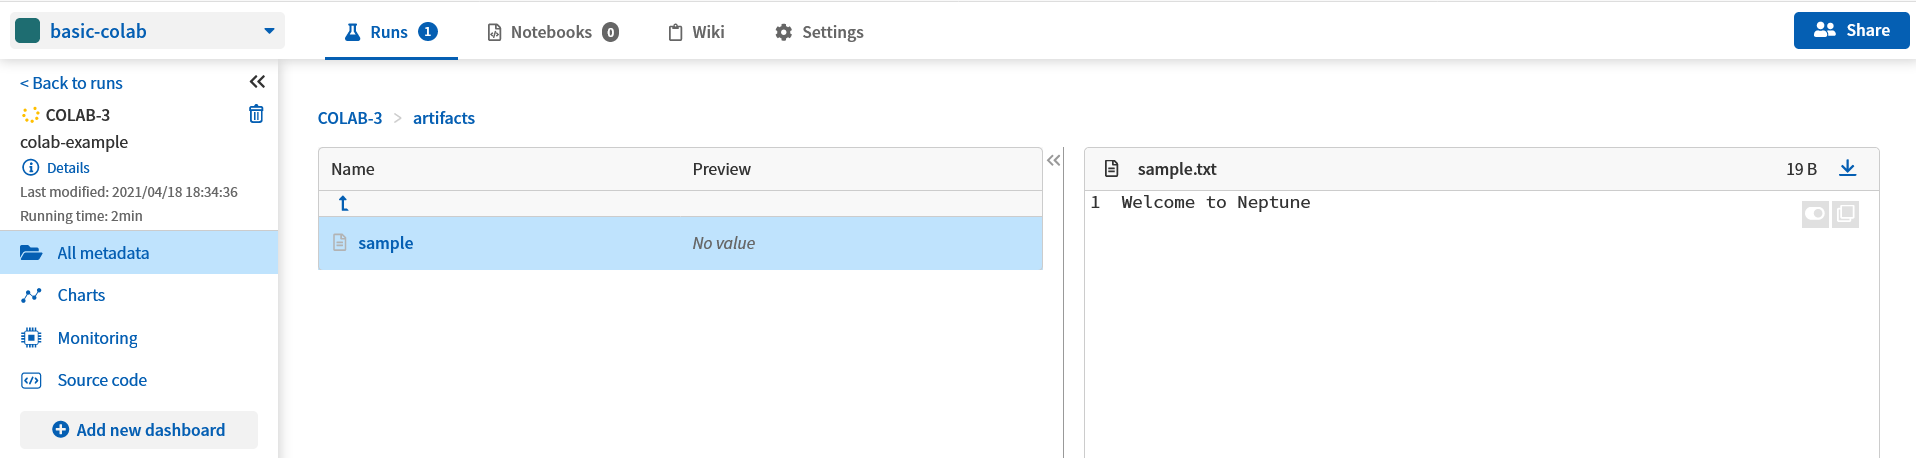

Go to the `All metadata` and `Charts` sections of the Neptune UI to see them. You can also check an [example run](https://app.neptune.ai/o/common/org/showroom/e/SHOW-37/charts) 

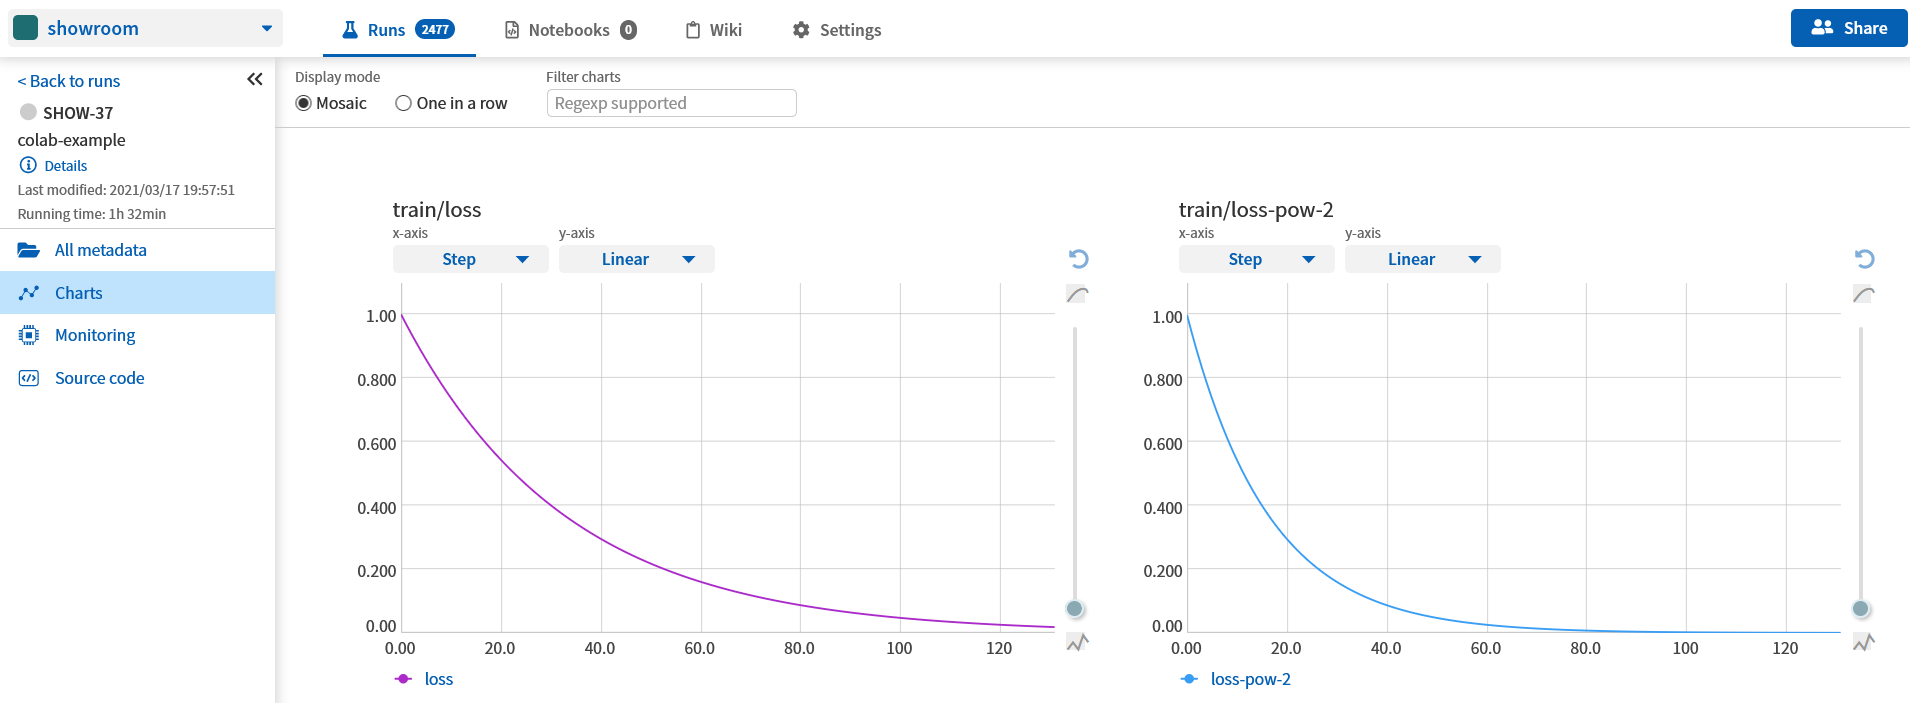

**Note:**

Neptune automatically logs the hardware consumption during the run. 

You can see it in the `Monitoring` section of the Neptune UI. 

![image](https://neptune.ai/wp-content/uploads/Product_hardware-usage-1.png)

# Step 4: Stop logging

Once you are done logging, you can stop tracking the run using the `stop()` method.
This is needed only while logging from a notebook environment. While logging through a script, Neptune automatically stops tracking once the script has completed execution.

In [ ]:
run.stop()

# Conclusion

You’ve learned how to:
* Install `neptune-client`,
* Connect Neptune to your Google Colab notebook and create a run,
* Log metadata to Neptune,
* See your metrics parameters and scores,
* See hardware consumption during the run.

# What's next

Now that you know how to create runs and log metrics, you can learn:

* [How to log other objects and monitor training in Neptune](https://neptune.ai/blog/monitoring-machine-learning-experiments-guide)
* [How to download runs data from Neptune](https://docs.neptune.ai/user-guides/logging-and-managing-runs-results/downloading-runs-data)
* [How to connect Neptune to the ML framework you are using](https://docs.neptune.ai/essentials/integrations)